## Binary Tree
> **Question 2:** Implement a binary tree using Python, and show its usage with some examples.

To begin, we'll create simple bianry tree (without any of the additional properties) containing numbers as keys within nodes. Here's an example:  
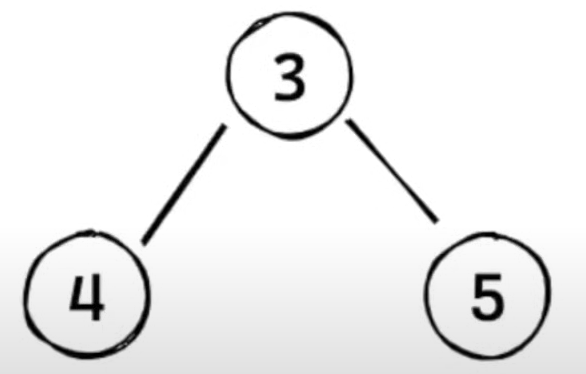  
Here's a simple class representing a node within a binary tree.

In [42]:
class TreeNode:
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None

Let's create objects representing each node of the above tree.

In [43]:
node0 = TreeNode(3)
node1 = TreeNode(4)
node2 = TreeNode(5)

Let's verify that the `node0` is an object of the type `TreeNode` and has the property `key` set to `3`.

In [44]:
node0

In [45]:
node0.key

3

We can *connect* the nodes by setting the `.left` and `.right` properties of the root node.

In [46]:
node0.left = node1
node0.right = node2

In [47]:
tree = node0

In [48]:
tree.key

3

In [49]:
tree.left.key

4

In [50]:
tree.right.key

5

Going forward, we'll use the term "tree" to refer to the root node. The term "node" can refer to any node in a tree, not necessarily the root.  
  
**Exercise:** Create the following binary tree using `TreeNode` class defined above.

In [51]:
node3 = TreeNode(2)
node4 = TreeNode(3)
node5 = TreeNode(1)
node6 = TreeNode(5)
node7 = TreeNode(3)
node8 = TreeNode(4)
node9 = TreeNode(7)
node10 = TreeNode(6)
node11 = TreeNode(8)

In [52]:
# node3
node3.left = node4
node3.right = node6

In [53]:
# node4
node4.left = node5

In [54]:
# node6
node6.left = node7
node6.right = node9

In [55]:
# node7
node7.right = node8

In [56]:
# node9
node9.left = node10
node9.right = node11

In [57]:
node9.left.key

6

In [58]:
node9.right.key

8

In [59]:
node6.left.key, node6.right.key

(3, 7)

It's a bit inconvenient to create a tree by manually connecting all the nodes. Let's write a helper function which can convert a tuple with the structure `(left_subtree, key, right_subtree)` (where `left_subtree` and `right_subtree` are themsleves tuples) into binary tree.  
  
Here's an tuple representing the tree shown above:

In [60]:
tree_tuple = ((1,3, None), 2, ((None, 3, 4), 5, (6,7,8)))

In [61]:
# class TreeNode:
#     def __init__(self, key):
#         self.key = key
#         self.left = None
#         self.right = None

def parse_tuple(data):
    if isinstance(data, tuple) and len(data) == 3:
        node = TreeNode(data[1])
        node.left = parse_tuple(data[0])
        node.right = parse_tuple(data[2])
    elif data is None:
        node = None
    else:
        node = TreeNode(data)
    return node

In [62]:
tree2 = parse_tuple(((1, 3, None), 2, ((None, 3, 4), 5, (6, 7, 8))))

In [63]:
tree2

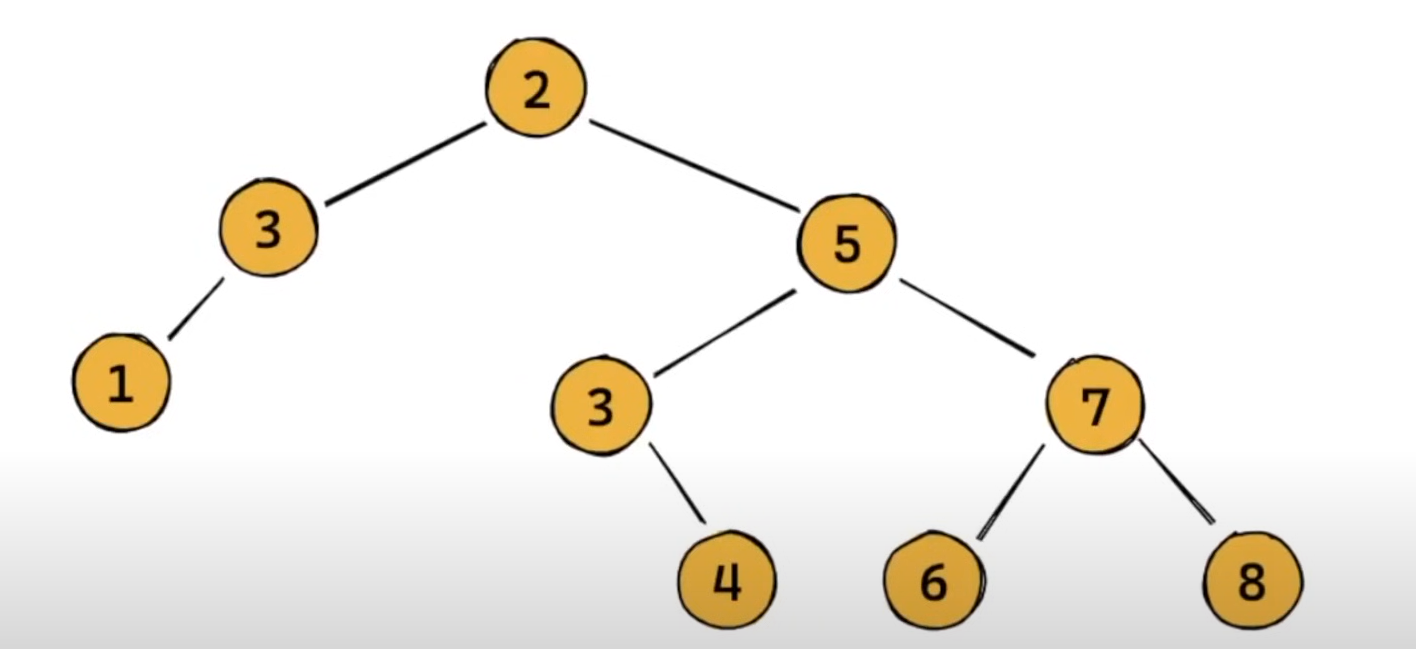

In [64]:
# level 0
tree2.key

2

In [65]:
# level 1
tree2.left.key, tree2.right.key

(3, 5)

In [66]:
# level 2
tree2.left.left.key, tree2.left.right, tree2.right.left.key, tree2.right.right.key

(1, None, 3, 7)

In [67]:
# level 3
tree2.right.left.right.key, tree2.right.right.left.key, tree2.right.right.right.key

(4, 6, 8)

**Exercise:** Define a function `tree_to_tuple` that converts a binary tree into a tuple representing the same tree. E.g. `tree_to_tuple` converts the tree created above to tuple `((1, 3, None), 2, ((None, 3, 4), 5, (6, 7, 8)))`.

1. Loop with condition if left an and right does not exist, that is the end. if left exist store it in tuple on D[0] and D[1] being the center and right being the D[2].

In [68]:
def tree_to_tuple(node):
    if not node:
        return None
    
    # Properly convert left and right subtrees
    left_tuple = tree_to_tuple(node.left)
    right_tuple = tree_to_tuple(node.right)

    print(left_tuple, node.key, right_tuple)
    
    # Return the tuple representation
    if left_tuple is None and right_tuple is None:
        return node.key  # Return value directly if both subtrees are None
    return (left_tuple, node.key, right_tuple)

In [69]:
%%time
tree_to_tuple(tree2)

None 1 None
1 3 None
None 4 None
None 3 4
None 6 None
None 8 None
6 7 8
(None, 3, 4) 5 (6, 7, 8)
(1, 3, None) 2 ((None, 3, 4), 5, (6, 7, 8))
CPU times: total: 0 ns
Wall time: 276 μs


((1, 3, None), 2, ((None, 3, 4), 5, (6, 7, 8)))

Let's create another helper function to to display all the keys in a tree-like structure for easier visualization.

In [70]:
def display_keys(node, space = '\t', level = 0):
    # print(node.key if node else None, level)

    # If node is empty
    if node is None:
        print(space*level + 'Ø')
        return
    
    # If the node is a leaf
    if node.left is None and node.right is None:
        print(space*level + str(node.key))
        return
    
    # If the node has children
    display_keys(node.right, space, level+1)
    print(space*level + str(node.key))
    display_keys(node.left, space, level+1)

In [71]:
display_keys(tree2,' ')

   8
  7
   6
 5
   4
  3
   Ø
2
  Ø
 3
  1


## Traversals
A *traversal* refers to the process of visiting each node of a tree exactly once. Visiting a node generally refers to adding the node's key to a list. There are three ways to traverse a binary tree and return the list if visited keys:  
  
### Inorder Traversal
1. Traverse the left subtree recursively inorder.
1. Traverse the current node.
1. Traverse the right subtree recursively inorder.
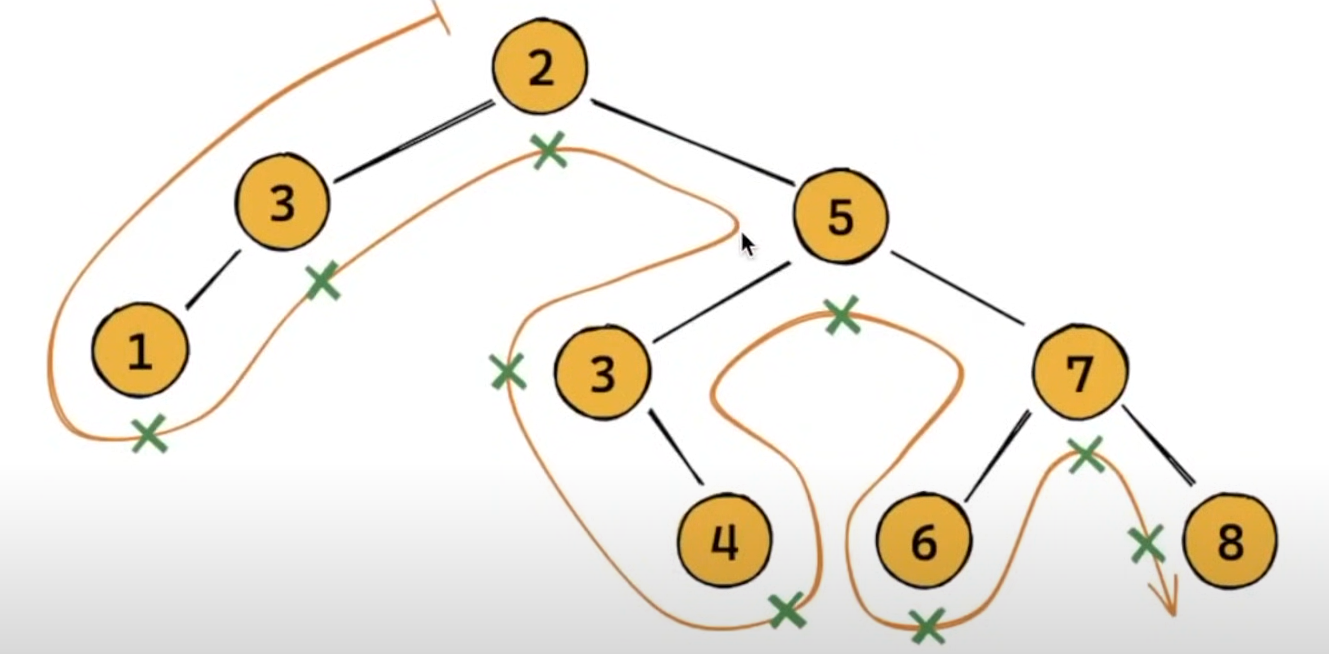
  
### Preorder Traversal
1. Traverse the current node.
1. Traverse the left subtree recursively inorder.
1. Traverse the right subtree recursively inorder.
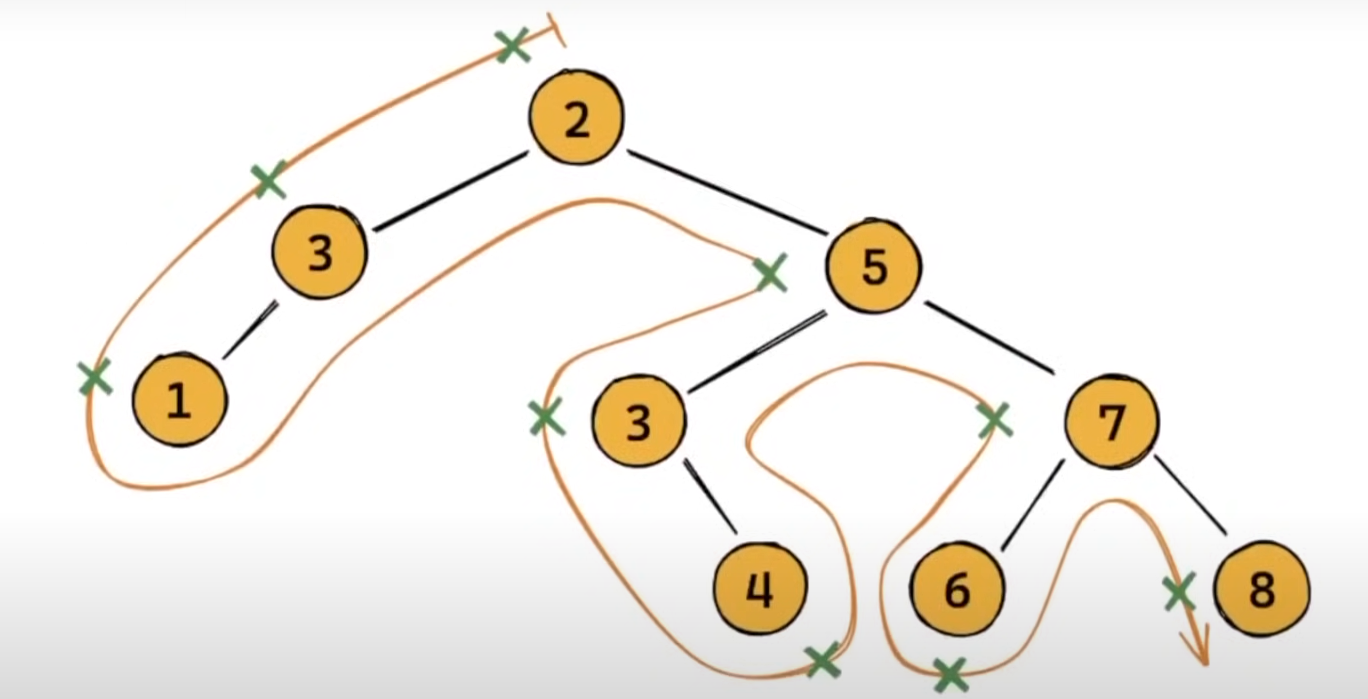
  
### Postorder Traversal
1. Traverse the right subtree recursively inorder.
1. Traverse the current node.
1. Traverse the left subtree recursively inorder.

In [72]:
# Inorder traversal implementation
def traverse_in_order(node):
    if node is None:
        return []
    return(traverse_in_order(node.left) + [node.key] + traverse_in_order(node.right))

In [73]:
traverse_in_order(tree2)

[1, 3, 2, 3, 4, 5, 6, 7, 8]

In [74]:
# Preorder traversal implementation
def traverse_pre_order(node):
    if node is None:
        return []
    return([node.key] + traverse_pre_order(node.left) + traverse_pre_order(node.right))

In [75]:
traverse_pre_order(tree2)

[2, 3, 1, 5, 3, 4, 7, 6, 8]

In [76]:
# Postorder traversal implementation
def traverse_post_order(node):
    if node is None:
        return []
    return(traverse_post_order(node.right) + [node.key] + traverse_post_order(node.left))

In [77]:
traverse_post_order(tree2)

[8, 7, 6, 5, 4, 3, 2, 3, 1]

### Height and Size of Binary Tree

In [86]:
def tree_height(node):
    if node is None:
        return 0
    return 1 + max(tree_height(node.left), tree_height(node.right))

In [87]:
tree_height(tree2)

4

### Count the number of nodes in a Binary Tree

In [88]:
def tree_size(node):
    if node is None:
        return 0
    return 1 + tree_size(node.left) + tree_size(node.right)

In [89]:
tree_size(tree2)

9

### Compiling all the functions we've return

In [115]:
class TreeNode():
    def __init__(self, key):
        self.key, self.left, self.right = key, None, None
    
    def height(self):
        if self is None:
            return 0
        return 1 + max(TreeNode.height(self.left), TreeNode.height(self.right))
    
    def size(self):
        if self is None:
            return 0
        return 1 + TreeNode.size(self.left) + TreeNode.size(self.right)
    
    def traverse_in_order(self):
        if self is None:
            return []
        return (TreeNode.traverse_in_order(self.left) + [self.key] + TreeNode.traverse_in_order(self.right))
    
    def display_keys(self, space = '\t', level = 0):
        # If node is empty
        if self is None:
            print(space*level + 'Ø')
            return
        
        # If the node is a leaf
        if self.left is None and self.right is None:
            print(space*level + str(self.key))
            return
        
        # If the node has children
        display_keys(self.right, space, level+1)
        print(space*level + str(self.key))
        display_keys(self.left, space, level+1)

    def to_tuple(self):
        if self is None:
            return None
        if self.left is None and self.right is None:
            return self.key
        return TreeNode.to_tuple(self.left), self.key, TreeNode.to_tuple(self.right)
    
    def __str__(self):
        return "BinaryTree <{}>".format(self.to_tuple())
    
    def _repr__(self):
        return "BinaryTree <{}>".format(self.to_tuple())
    
    @staticmethod
    def parse_tuple(data):
        if data is None:
            node = None
        elif isinstance(data, tuple) and len(data) == 3:
            node = TreeNode.parse_tuple(data[1])
            node.left = TreeNode.parse_tuple(data[0])
            node.right = TreeNode.parse_tuple(data[2])
        else:
            node = TreeNode(data)
        return node

In [116]:
tree_tuple

((1, 3, None), 2, ((None, 3, 4), 5, (6, 7, 8)))

In [117]:
tree = TreeNode.parse_tuple(tree_tuple)

In [118]:
tree

In [119]:
tree.display_keys(' ')

   8
  7
   6
 5
   4
  3
   Ø
2
  Ø
 3
  1


In [120]:
tree.height()

4

In [121]:
tree.size()

9

In [122]:
tree.traverse_in_order()

[1, 3, 2, 3, 4, 5, 6, 7, 8]

In [123]:
tree.to_tuple()

((1, 3, None), 2, ((None, 3, 4), 5, (6, 7, 8)))